In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
# Return adjacency matrix for any given graph
def get_adj(H):
    A = nx.adjacency_matrix(H)
    print(A.todense())
    print("\n")
    return

# Function to return max clique, check if all cliques are of size 3, num is a parameter used to print out all
# the simplicies if needed
def get_maxclique(H, num):
    check = False
    n = 1
    Y = nx.find_cliques(H)
    for i in Y:
        #print(i)
        if len(i) != 3:
            check = True
            print(i)
        if num == 0:
            plt.figure(n, figsize=(1,1))
            nx.draw(H.subgraph(i).copy(), pos=nx.spring_layout(H), node_color='lightgray', \
                edge_color='black', with_labels=True)
            n += 1
    print("\n")
    return check
    
# Function to create a triangle planar graph like in Farr & Fink Fig 3.
def get_testgraph():
    list = [i for i in range(0,8)]
    print(list)
    H = nx.Graph()
    for i in list:
        H.add_node(i)

    H.add_edge(0,1)
    H.add_edge(0,2)
    H.add_edge(0,3)
    H.add_edge(0,4)
    H.add_edge(0,5)
    H.add_edge(1,2)
    H.add_edge(1,5)
    H.add_edge(1,6)
    H.add_edge(1,7)

    H.add_edge(2,3)
    H.add_edge(3,4)
    H.add_edge(4,5)
    H.add_edge(5,6)
    H.add_edge(6,7)
    H.add_edge(2,7)

    nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
            edge_color='black', with_labels=True)
    return H

In [3]:
# Function that allows you to choose which two nodes to pop

def new_pop(G,node,node2):

    #node = random.randint(min(G.nodes()),max(G.nodes()))
    print('node: ',node)
    nbr = [n for n in G[node]]
    #print('neighbor: ', nbr)

    nnbr = []

    nbr2 = [n for n in G[node2]]
    #print(nbr2)
    for j in nbr2:
        if (j in nbr) == True and j != node:
            nnbr.append(j)
        else:
            continue

    if len(nnbr) < 2:
        print("ERROR: Chosen node2 doesn't work \n")
    else:

        print('Other random node: ', node2)
        p = nnbr[0]
        q = nnbr[1]
        print('Chosen neighbors: ',p,'and',q)


        temp1 = nbr.copy()
        temp2 = nbr2.copy()

        temp1.remove(p)
        temp1.remove(q)
        temp1.remove(node2)
        temp2.remove(p)
        temp2.remove(q)
        temp2.remove(node)

        check1 = False
        for i in temp1:
            if check1 == True:
                print('break')
                break
            else:
                for j in temp2:
                    check1 = i in G.neighbors(j)
                    if check1 == True:
                        break
                    else:
                        continue

        if check1 == True:
            print("ERROR: Neighbors of node and node2 are connected.")
            print('Exiting...\n')
        else:
            new_nbr = temp1 + temp2
            new_nbr.append(p)
            new_nbr.append(q)
            #print(new_nbr)

            for i in nbr:
                #print(i)
                G.remove_edge(node,i)
            print('Removing all edges to ...', node)

            for i in nbr2:
                if i != node:
                    G.remove_edge(node2,i)
            print('Removing all edges to ...', node2)

            G.remove_node(node2)

            for i in new_nbr:
                G.add_edge(node,i)
            print('Adding required edges...')
            print('SUCCESS\n')

In [4]:
def push(G):
    check = True
    while check is True:
        
        # Choose random node and a random neighbor of that node
        listofnodes = [k for k in G]
        node = random.choice(listofnodes)
        print('random node: ',node)
        nbr = [n for n in G[node]]
        print('neighbor: ', nbr)
        p = random.choice(nbr)
        
        # Choose another neighbor that is not connected to the neighbor chosen above
        for q in nbr:
            print(q)
            boo = p in G.neighbors(q)
            if boo == False and p != q:
                print('Chosen neighbors: ', p,q)
                break
            
        # Condition to break if the 2nd neighbor isn't found even after the above forloop
        if boo == True or p == q:
            print('ERROR: Did not find neighbors\n')
            continue
        else:
            new_node = max(G.nodes)+1
            G.add_node(new_node)
            print('Adding new_node: ', new_node)

            for i in nbr:
                G.remove_edge(node,i)
            #print('Removing all edges to ...', node)

            G.add_edge(node,new_node)
            
            # Algorithm to sort neighbors in a (counter)clockwise manner (as opppose to sequentially)
            sort_nbr = [nbr[0]]
            check1 = False
            while check1 is False:
                for i in range(1,len(nbr)):
                    if (nbr[i] in G.neighbors(sort_nbr[-1])) == True and (nbr[i] in sort_nbr) == False:
                        sort_nbr.append(nbr[i])
                    if (nbr[i] in G.neighbors(sort_nbr[0])) == True and (nbr[i] in sort_nbr) == False:
                        sort_nbr.insert(0,nbr[i])
                    if len(sort_nbr) == len(nbr):
                        check1 = True
                        break
            print(sort_nbr)

            # Create two separate list of "neighbors to be joined", i.e. neighbors for A' and B
            temp1=[]
            temp2=[]
            if sort_nbr.index(p) < sort_nbr.index(q):
                for i in range(0,len(sort_nbr)):
                    if i >= sort_nbr.index(p) and i <= sort_nbr.index(q):
                        temp1.append(sort_nbr[i])
                    if i <= sort_nbr.index(p) or i >= sort_nbr.index(q):
                        temp2.append(sort_nbr[i])
            else:
                for i in range(0,len(sort_nbr)):
                    if i <= sort_nbr.index(p) and i >= sort_nbr.index(q):
                        temp1.append(sort_nbr[i])
                    if i >= sort_nbr.index(p) or i <= sort_nbr.index(q):
                        temp2.append(sort_nbr[i])
                    
            print(temp1, temp2)
            

            for i in temp1:
                G.add_edge(node,i)

            node_nbr = [i for i in G[node]]
            #print('Neighbors of %i: ' %node, node_nbr)

            for i in temp2:
                G.add_edge(new_node,i)

            new_node_nbr = [i for i in G[new_node]]
            #print('Neighbors of %i: ' %new_node, new_node_nbr)

            check = False
            print('SUCCESS\n')    

In [5]:
def pop(G):
    check = True
    while check is True:
        listofnodes = [k for k in G]
        node = random.choice(listofnodes)
        nbr = [n for n in G[node]]
        #print('neighbor: ', nbr)
        
        # Pick node2 such that it shares P and Q with random node chosen above
        nnbr = []
        for i in nbr:
            nbr2 = [n for n in G[i]]
            #print(nbr2)
            for j in nbr2:
                if (j in nbr) == True and j != node:
                    nnbr.append(j)
                else:
                    continue
            if len(nnbr) >= 2:
                node2 = i
                break
            else:
                nnbr.clear()

        # Check to see if node2 has at least 2 shared neighbors with random node
        if len(nnbr) < 2:
            print('ERROR: The two chosen nodes did not have enough shared neighbors\n')
            continue
        
        print('Chosen random nodes: ',node, 'and', node2)
        p = nnbr[0]
        q = nnbr[1]
        print('Chosen neighbors: ',p,'and',q)
        
        
        temp1 = nbr.copy()
        temp2 = nbr2.copy()

        # Create a list of neighbors of node and node2 and check if they are connected
        # Removing special nodes: node, node2, p, and q
        temp1.remove(p)
        temp1.remove(q)
        temp1.remove(node2)
        temp2.remove(p)
        temp2.remove(q)
        temp2.remove(node)
        
        # Check if temp1 and temp2 have any shared connection
        check1 = False
        for i in temp1:
            if check1 == True:
                print('break')
                break
            else:
                for j in temp2:
                    check1 = i in G.neighbors(j)
                    if check1 == True:
                        break
                    else:
                        continue
        
        if check1 == True:
            print("ERROR: Neighbors of node and node2 are connected.")
            print('Exiting...\n')
        else:
            # Create new list of neighbor which is just the sum of temp1 and temp2
            new_nbr = temp1 + temp2
            new_nbr.append(p)
            new_nbr.append(q)
            #print(new_nbr)

            for i in nbr:
                #print(i)
                G.remove_edge(node,i)
            print('Removing all edges to ...', node)

            for i in nbr2:
                if i != node:
                    G.remove_edge(node2,i)
            print('Removing all edges to ...', node2)

            G.remove_node(node2)

            for i in new_nbr:
                G.add_edge(node,i)
            print('Adding required edges...')
            print('SUCCESS\n')
            check = False

[0, 1, 2, 3, 4, 5, 6, 7]


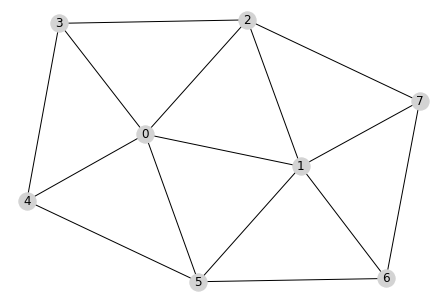

In [6]:
G = get_testgraph()

iteration:  0
random node:  7
neighbor:  [1, 6, 2]
1
6
Chosen neighbors:  2 6
Adding new_node:  8
[2, 1, 6]
[2, 1, 6] [2, 6]
SUCCESS



iteration:  1
random node:  6
neighbor:  [1, 5, 7, 8]
1
Chosen neighbors:  8 1
Adding new_node:  9
[8, 7, 1, 5]
[8, 7, 1] [8, 1, 5]
SUCCESS



iteration:  2
random node:  6
neighbor:  [9, 8, 7, 1]
9
8
Chosen neighbors:  1 8
Adding new_node:  10
[9, 8, 7, 1]
[8, 7, 1] [9, 8, 1]
SUCCESS



iteration:  3
random node:  4
neighbor:  [0, 3, 5]
0
3
5
ERROR: Did not find neighbors

random node:  0
neighbor:  [1, 2, 3, 4, 5]
1
2
3
4
Chosen neighbors:  2 4
Adding new_node:  11
[1, 2, 3, 4, 5]
[2, 3, 4] [1, 2, 4, 5]
SUCCESS



iteration:  4
random node:  6
neighbor:  [10, 8, 7, 1]
10
8
7
Chosen neighbors:  10 7
Adding new_node:  12
[10, 8, 7, 1]
[10, 8, 7] [10, 7, 1]
SUCCESS



iteration:  5
random node:  1
neighbor:  [2, 5, 7, 9, 10, 11, 12]
2
5
Chosen neighbors:  2 5
Adding new_node:  13
[9, 5, 11, 2, 7, 12, 10]
[5, 11, 2] [9, 5, 2, 7, 12, 10]
SUCCESS



iterat

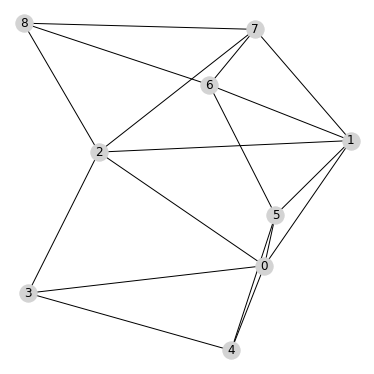

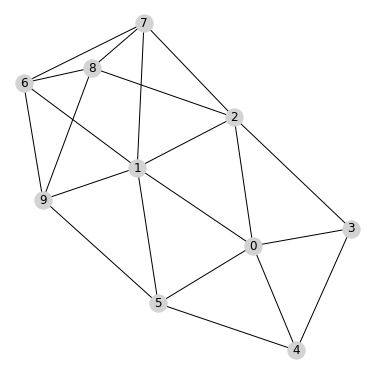

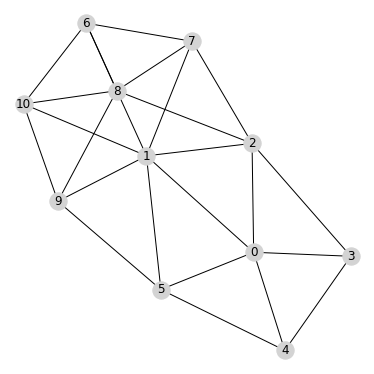

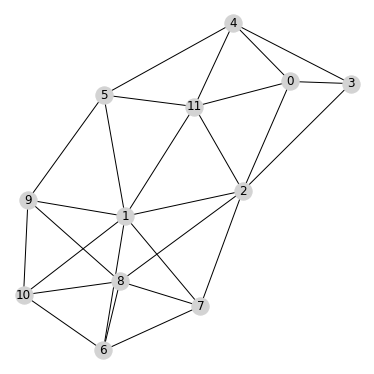

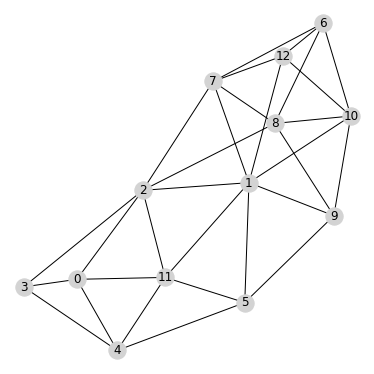

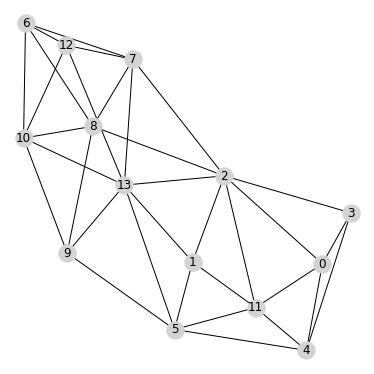

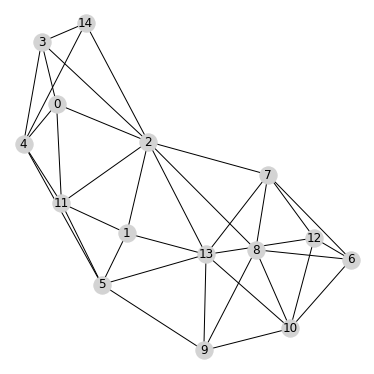

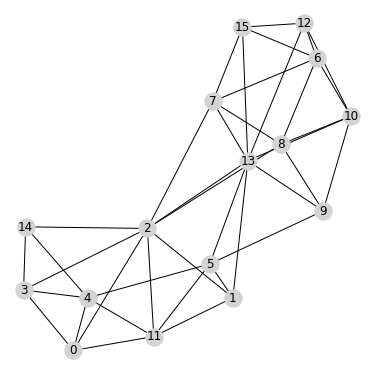

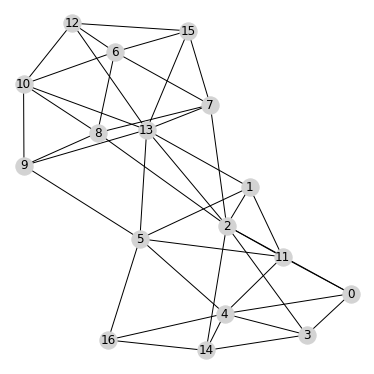

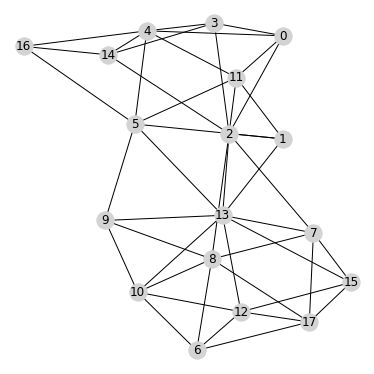

In [7]:
for i in range(0,10):
    print('iteration: ',i)
    push(G)
    if get_maxclique(G,1) == True:
        print('Cliques not preserved')
        nx.draw(G, pos=nx.spring_layout(G), node_color='lightgray', \
                edge_color='black', with_labels=True)
        break
    else:
        plt.figure(i, figsize=(5,5))
        nx.draw(G, pos=nx.spring_layout(G), node_color='lightgray', \
            edge_color='black', with_labels=True)

iteration:  0
Chosen random nodes:  14 and 3
Chosen neighbors:  2 and 4
Removing all edges to ... 14
Removing all edges to ... 3
Adding required edges...
SUCCESS



iteration:  1
Chosen random nodes:  10 and 9
Chosen neighbors:  8 and 13
Removing all edges to ... 10
Removing all edges to ... 9
Adding required edges...
SUCCESS



iteration:  2
Chosen random nodes:  11 and 0
Chosen neighbors:  2 and 4
Removing all edges to ... 11
Removing all edges to ... 0
Adding required edges...
SUCCESS



iteration:  3
Chosen random nodes:  12 and 15
Chosen neighbors:  13 and 17
Removing all edges to ... 12
Removing all edges to ... 15
Adding required edges...
SUCCESS



iteration:  4
Chosen random nodes:  16 and 4
Chosen neighbors:  5 and 14
Removing all edges to ... 16
Removing all edges to ... 4
Adding required edges...
SUCCESS



iteration:  5
Chosen random nodes:  2 and 7
Chosen neighbors:  8 and 13
Removing all edges to ... 2
Removing all edges to ... 7
Adding required edges...
SUCCESS



itera

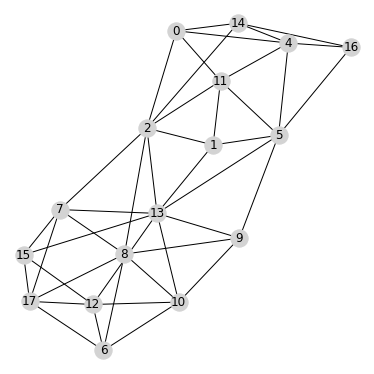

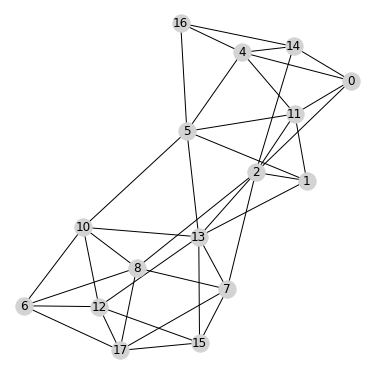

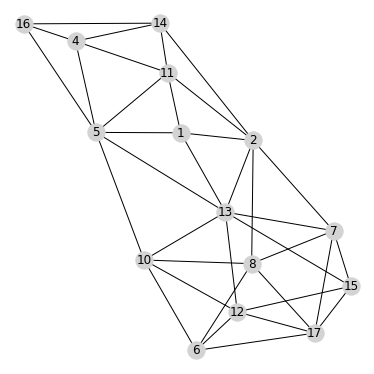

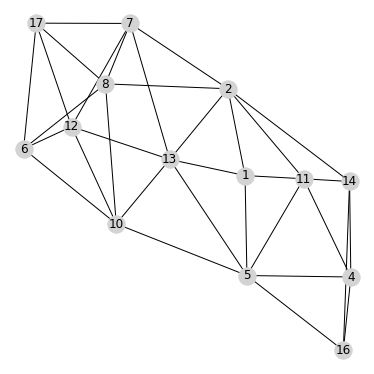

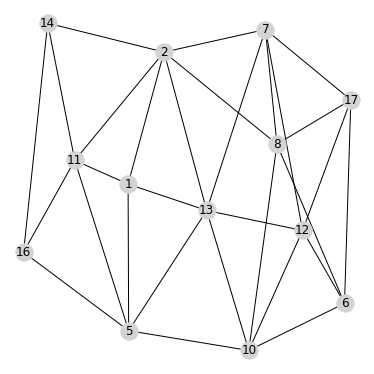

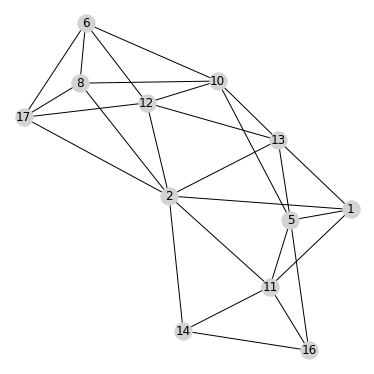

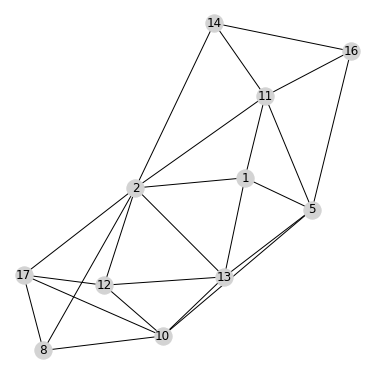

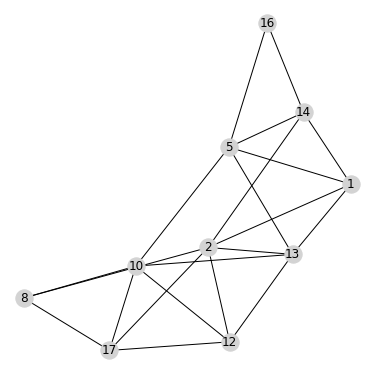

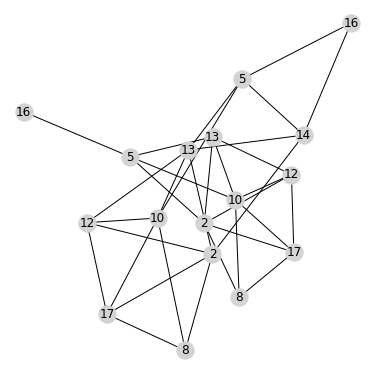

In [8]:
for i in range(0,10):
    print('iteration: ',i)
    pop(G)
    if get_maxclique(G,1) == True:
        print('Cliques not preserved')
        nx.draw(G, pos=nx.spring_layout(G), node_color='lightgray', \
                edge_color='black', with_labels=True)
        break
    else:
        plt.figure(i, figsize=(5,5))
        nx.draw(G, pos=nx.spring_layout(G), node_color='lightgray', \
            edge_color='black', with_labels=True)

In [9]:
get_maxclique(G,1) # Return True means cliques aren't preserved. This occurs in this case due to the nature of the
                   # triangle planar graph, there are "outer-edge" simplicies.

[16, 5]




True

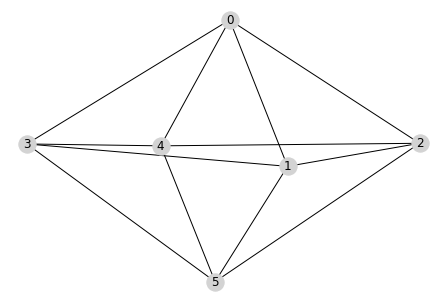

In [34]:
H = nx.octahedral_graph()
nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
    edge_color='black', with_labels=True)

In [35]:
for i in range(0,10):
    print('iteration: ',i)
    push(H)
    if get_maxclique(H,1) == True:
        print('Cliques not preserved')
        nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
                edge_color='black', with_labels=True)
        break
#     else:
#         plt.figure(i, figsize=(5,5))
#         nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
#             edge_color='black', with_labels=True)

iteration:  0
random node:  0
neighbor:  [1, 2, 3, 4]
1
2
3
4
Chosen neighbors:  1 4
Adding new_node:  6
[3, 1, 2, 4]
[1, 2, 4] [3, 1, 4]
SUCCESS



iteration:  1
random node:  4
neighbor:  [2, 3, 5, 0, 6]
2
3
Chosen neighbors:  0 3
Adding new_node:  7
[6, 0, 2, 5, 3]
[0, 2, 5, 3] [6, 0, 3]
SUCCESS



iteration:  2
random node:  6
neighbor:  [0, 3, 1, 7]
0
3
1
7
Chosen neighbors:  1 7
Adding new_node:  8
[7, 0, 1, 3]
[7, 0, 1] [7, 1, 3]
SUCCESS



iteration:  3
random node:  5
neighbor:  [1, 2, 3, 4]
1
2
Chosen neighbors:  3 2
Adding new_node:  9
[3, 1, 2, 4]
[3, 1, 2] [3, 2, 4]
SUCCESS



iteration:  4
random node:  0
neighbor:  [1, 2, 4, 7, 6]
1
Chosen neighbors:  7 1
Adding new_node:  10
[1, 2, 4, 7, 6]
[1, 2, 4, 7] [1, 7, 6]
SUCCESS



iteration:  5
random node:  2
neighbor:  [1, 4, 5, 9, 0]
1
Chosen neighbors:  9 1
Adding new_node:  11
[0, 1, 5, 9, 4]
[1, 5, 9] [0, 1, 9, 4]
SUCCESS



iteration:  6
random node:  5
neighbor:  [9, 3, 1, 2]
9
3
Chosen neighbors:  2 3
Adding new_node:

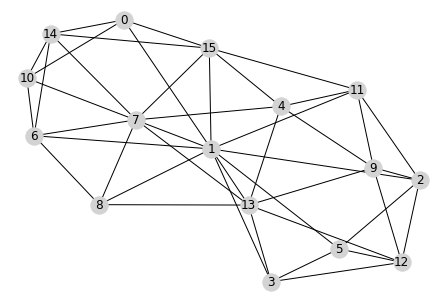

In [36]:
nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
    edge_color='black', with_labels=True)

In [37]:
for i in range(0,10):
    print('iteration: ',i)
    pop(H)
    if get_maxclique(H,1) == True:
        print('Cliques not preserved')
        nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
                edge_color='black', with_labels=True)
        break
#     else:
#         plt.figure(i, figsize=(5,5))
#         nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
#             edge_color='black', with_labels=True)

iteration:  0
Chosen random nodes:  7 and 4
Chosen neighbors:  13 and 15
Removing all edges to ... 7
Removing all edges to ... 4
Adding required edges...
SUCCESS



iteration:  1
Chosen random nodes:  1 and 6
Chosen neighbors:  8 and 10
break
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  5 and 12
Chosen neighbors:  2 and 3
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  5 and 12
Chosen neighbors:  2 and 3
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  10 and 14
Chosen neighbors:  6 and 0
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  5 and 12
Chosen neighbors:  2 and 3
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  1 and 6
Chosen neighbors:  8 and 10
break
ERROR: Neighbors of node and node2 are connected.
Exiting...

Chosen random nodes:  15 and 0
Chosen neighbors:  14 and 1
Removing all edges to ... 15


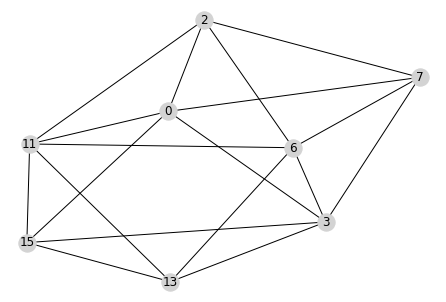

In [33]:
nx.draw(H, pos=nx.spring_layout(H), node_color='lightgray', \
    edge_color='black', with_labels=True)